In [2]:
import pandas as pd
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df_original=pd.read_excel('Feature_data.xlsx')

In [4]:
df_original.head()

,Dish,Salty level(1~5),Sugar level(1~5),Fat level,Carbohydrate level,Caffeine level,Protein Level,Gluten/Gluten free,Whole Grain (Yes/no),Spicy level,...,"Heavy food or light food? (Heavy – Cream, cheese, kidney beans.Light – Puffed rice, Popcorn.)","Oily or Dry(Oily – Nuts, fats and oils, black lentil. Dry – Millet, rye, corn.)","Slimy or rough(Slimy – okra, full cream yogurt.Rough – Most millets, broccoli, cauliflower, oats.)","Cloudy or clear(Cloudy – Mayonnaise, butter, Sea food.Clear – Clarified butter milk, black eyed pea, bitters.)","Dense or Liquid(Dense – Cream, potatoes.Liquid – all water based beverages, soups, milk.)","Gross or Subtle(Gross – Roots and tubers, Dates, minerals.Subtle – Spices, saffron, oils)","Slow or Sharp(Slow – Yogurt, red meat, condensed milk.Sharp – Onion, ginger, Garlic, Bell peppers, mustard greens.)","Temperature of the food( Cold – Mint, coconut water, water melon, rice. Hot – Peppers, nutmeg, turkey meat.)","Soft or hard(Soft – Puffed rice, Tapioca, pasta.Hard – Nuts, jack fruit.)","Organic or not(Yes, no)"
0,Korean style gnocchi w/ Sausage,3,4,2,5,1,3,1,2,5,...,1,1,1,1,1,1,2,2,1,2
1,Vegetable Cracker w/Avocado Mousse,2,2,2,3,1,2,1,2,1,...,2,2,2,2,1,1,1,1,2,1
2,Coffe Kombucha Glazed Parsnips,2,4,4,3,5,1,2,2,1,...,2,2,2,2,1,1,1,1,2,1
3,Pozole,4,2,3,4,1,3,2,2,4,...,1,1,1,1,2,2,2,2,1,2
4,"Roasted Beet Salad W/Sour Beer Vinaigrette, Gr...",2,1,1,1,1,2,2,2,1,...,2,2,2,2,1,1,2,1,2,1


In [5]:
df=df_original.loc[:, df_original.columns != 'Dish']

In [6]:
df=df.drop(columns=['Caffeine level'])

In [7]:
# Standardize the data to control the variance 
# scaler = StandardScaler()
# scaler.fit(df)
# StandardScaler(copy=True, with_mean=True, with_std=True)
# df = scaler.transform(df)

[0.41670359 0.16810463 0.1225415 ]


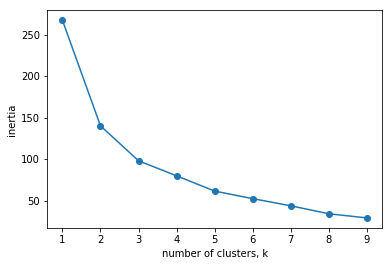

In [20]:
# Inertia measures clustering quality
# ● Measures how spread out the clusters are (lower is be!er)
# ● Distance from each sample to centroid of its cluster
# ● k-means a!empts to minimize the inertia when choosing clusters

# How many clusters to choose?
# ● A good clustering has tight clusters (so low inertia)
# ● ... but not too many clusters!
# ● Choose an "elbow" in the inertia plot
# ● Where inertia begins to decrease more slowly


#Adding PCA to reduce attributes

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(df)
final_df=pca.transform(df)
print(pca.explained_variance_ratio_) 
#print(final_df)

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(final_df)
    
    # Append the inertia to the list of inertias
    
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=3)
model.fit(final_df)
labels = model.predict(final_df)
final_df

array([[-2.34361715,  1.39433454,  3.37123838],
       [ 1.44553976, -1.62716373,  0.6439389 ],
       [-0.23461866, -2.18364816,  1.08633383],
       [-1.66931486,  1.25950582,  1.594646  ],
       [ 3.54982769, -0.71886856,  0.55927041],
       [-1.67045974,  0.2095455 , -1.30030693],
       [-2.71086009,  1.10308061, -0.02855007],
       [-1.97555436,  0.44854334, -0.89161082],
       [-0.92405363, -1.63320386, -0.38730009],
       [-3.37096761, -1.69236982,  0.6119593 ],
       [-1.04151643, -1.35289051, -0.16490034],
       [-0.74625331,  0.97391513,  0.4141507 ],
       [ 1.54438469,  1.23844546,  2.44591829],
       [-0.23904827, -0.17206448, -0.71047692],
       [-1.04151643, -1.35289051, -0.16490034],
       [ 3.19780607,  1.20609451, -1.13505593],
       [-2.02300525, -1.60357599, -0.28287719],
       [-0.38492617, -2.00045262,  0.35688584],
       [ 3.44446469, -0.54415774,  0.55053174],
       [-1.52669045, -0.69161663, -0.57139258],
       [ 3.51869615, -0.02778228,  0.073

In [29]:
df_visualize=pd.concat([df.reset_index(drop=True),pd.DataFrame(final_df)],axis=1)
df_visualize.columns.values[-3:]=['component1','component2','component3']
df_visualize['clusters']=labels
df_visualize['clusters']=df_visualize['clusters'].map({0:'first',1:'second',2:'third'})
df_visualize.head()

#df['cluster']=labels.tolist()

,Salty level(1~5),Sugar level(1~5),Fat level,Carbohydrate level,Protein Level,Gluten/Gluten free,Whole Grain (Yes/no),Spicy level,Artifical color(Yes/no),"Heavy food or light food? (Heavy – Cream, cheese, kidney beans.Light – Puffed rice, Popcorn.)",...,"Dense or Liquid(Dense – Cream, potatoes.Liquid – all water based beverages, soups, milk.)","Gross or Subtle(Gross – Roots and tubers, Dates, minerals.Subtle – Spices, saffron, oils)","Slow or Sharp(Slow – Yogurt, red meat, condensed milk.Sharp – Onion, ginger, Garlic, Bell peppers, mustard greens.)","Temperature of the food( Cold – Mint, coconut water, water melon, rice. Hot – Peppers, nutmeg, turkey meat.)","Soft or hard(Soft – Puffed rice, Tapioca, pasta.Hard – Nuts, jack fruit.)","Organic or not(Yes, no)",component1,component2,component3,clusters
0,3,4,2,5,3,1,2,5,1,1,...,1,1,2,2,1,2,-2.343617,1.394335,3.371238,second
1,2,2,2,3,2,1,2,1,2,2,...,1,1,1,1,2,1,1.445540,-1.627164,0.643939,first
2,2,4,4,3,1,2,2,1,2,2,...,1,1,1,1,2,1,-0.234619,-2.183648,1.086334,third
3,4,2,3,4,3,2,2,4,2,1,...,2,2,2,2,1,2,-1.669315,1.259506,1.594646,second
4,2,1,1,1,2,2,2,1,2,2,...,1,1,2,1,2,1,3.549828,-0.718869,0.559270,first


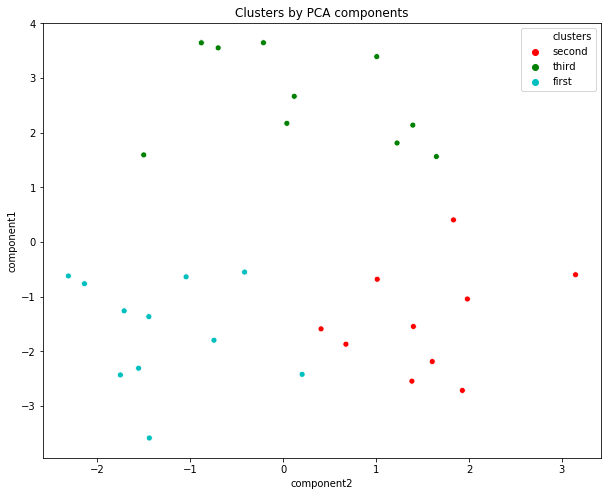

In [52]:
import seaborn as sns
x_axis=df_visualize['component2']
y_axis=df_visualize['component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_visualize['clusters'],palette=['r','g','c'])
plt.title('Clusters by PCA components')
plt.show()


In [35]:
df.insert(0, 'clusters', labels.tolist())

In [36]:
df.head()

,clusters,Salty level(1~5),Sugar level(1~5),Fat level,Carbohydrate level,Protein Level,Gluten/Gluten free,Whole Grain (Yes/no),Spicy level,Artifical color(Yes/no),"Heavy food or light food? (Heavy – Cream, cheese, kidney beans.Light – Puffed rice, Popcorn.)","Oily or Dry(Oily – Nuts, fats and oils, black lentil. Dry – Millet, rye, corn.)","Slimy or rough(Slimy – okra, full cream yogurt.Rough – Most millets, broccoli, cauliflower, oats.)","Cloudy or clear(Cloudy – Mayonnaise, butter, Sea food.Clear – Clarified butter milk, black eyed pea, bitters.)","Dense or Liquid(Dense – Cream, potatoes.Liquid – all water based beverages, soups, milk.)","Gross or Subtle(Gross – Roots and tubers, Dates, minerals.Subtle – Spices, saffron, oils)","Slow or Sharp(Slow – Yogurt, red meat, condensed milk.Sharp – Onion, ginger, Garlic, Bell peppers, mustard greens.)","Temperature of the food( Cold – Mint, coconut water, water melon, rice. Hot – Peppers, nutmeg, turkey meat.)","Soft or hard(Soft – Puffed rice, Tapioca, pasta.Hard – Nuts, jack fruit.)","Organic or not(Yes, no)"
0,1,3,4,2,5,3,1,2,5,1,1,1,1,1,1,1,2,2,1,2
1,0,2,2,2,3,2,1,2,1,2,2,2,2,2,1,1,1,1,2,1
2,2,2,4,4,3,1,2,2,1,2,2,2,2,2,1,1,1,1,2,1
3,1,4,2,3,4,3,2,2,4,2,1,1,1,1,2,2,2,2,1,2
4,0,2,1,1,1,2,2,2,1,2,2,2,2,2,1,1,2,1,2,1


In [37]:
df_original['clusters'] = labels.tolist()

In [38]:
df_dish=df_original[['Dish','clusters']].sort_values(by=['clusters'])

In [39]:
df_dish

,Dish,clusters
26,"Sesame Salad (cucumber, tomato, mixed greens t...",0
18,"Toast- Sourdough, Cauliflower spread, Crispy s...",0
20,"Beets & berries salad with fresh ricotta, gard...",0
12,spicy roast cauliflower,0
22,"Sicilian calamari salad w/ raisins, capers & t...",0
23,Greek chicken kebobs w/ cucumber sauce,0
15,"Salmon Tartare- Cured salmon, Egg emulsion, On...",0
32,Kale Dolmas,0
4,"Roasted Beet Salad W/Sour Beer Vinaigrette, Gr...",0
30,greek villager salad,0


In [20]:
# Build a recommendation system base on the cluster of the dishes

#Guest can imput the preference features---
# Model will put them into the specific cluster----
# recommendation will be made. 

# For now we can just handlable the features for each dish, in the future the feature labeling can be automized

In [22]:
df.head()

,cluster,Salty level(1~5),Sugar level(1~5),Fat level,Carbohydrate level,Protein Level,Gluten/Gluten free,Whole Grain (Yes/no),Spicy level,Artifical color(Yes/no),"Heavy food or light food? (Heavy – Cream, cheese, kidney beans.Light – Puffed rice, Popcorn.)","Oily or Dry(Oily – Nuts, fats and oils, black lentil. Dry – Millet, rye, corn.)","Slimy or rough(Slimy – okra, full cream yogurt.Rough – Most millets, broccoli, cauliflower, oats.)","Cloudy or clear(Cloudy – Mayonnaise, butter, Sea food.Clear – Clarified butter milk, black eyed pea, bitters.)","Dense or Liquid(Dense – Cream, potatoes.Liquid – all water based beverages, soups, milk.)","Gross or Subtle(Gross – Roots and tubers, Dates, minerals.Subtle – Spices, saffron, oils)","Slow or Sharp(Slow – Yogurt, red meat, condensed milk.Sharp – Onion, ginger, Garlic, Bell peppers, mustard greens.)","Temperature of the food( Cold – Mint, coconut water, water melon, rice. Hot – Peppers, nutmeg, turkey meat.)","Soft or hard(Soft – Puffed rice, Tapioca, pasta.Hard – Nuts, jack fruit.)","Organic or not(Yes, no)"
0,0,3,4,2,5,3,1,2,5,1,1,1,1,1,1,1,2,2,1,2
1,1,2,2,2,3,2,1,2,1,2,2,2,2,2,1,1,1,1,2,1
2,6,2,4,4,3,1,2,2,1,2,2,2,2,2,1,1,1,1,2,1
3,0,4,2,3,4,3,2,2,4,2,1,1,1,1,2,2,2,2,1,2
4,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,1,2,1,2,1


In [32]:
Salty_level=5
Sugar_level=5
Fat_level=5
Carbohydrate_level=4
Protein_Level=5
Gluten_Glutenfree=2
WholeGrain_NotWholeGrain=2
Spicy_level=1
Artificalcolor_NArtificalcolor=2
Heavy_light_food=1
Oily_Dry=2
Slimy_rough=2
Cloudy_clear=2
Dense_Liquid=1
Gross_Subtle=1
Slow_Sharp=1
Temperature_of_the_food=2
Soft_hard=1
Organic_NotOrganic=1

In [33]:
guest_1=[[Salty_level,Sugar_level,Fat_level,Carbohydrate_level,Protein_Level,Gluten_Glutenfree,WholeGrain_NotWholeGrain,Spicy_level,Artificalcolor_NArtificalcolor,Heavy_light_food,Oily_Dry,Slimy_rough,Cloudy_clear,Dense_Liquid,Gross_Subtle,Slow_Sharp,Temperature_of_the_food,Soft_hard,Organic_NotOrganic]]
label_guest = model.predict(guest_1)

In [34]:
list=df_dish[df_dish['clusters']==label_guest[0]]['Dish'].tolist()
print('According to your preference we think you will enjoy:', *list, sep = ",")  

According to your preference we think you will enjoy:,NOLA BBQ Shrimp and Pan Seared Grit Cake W/ Tasso Bacon,Pappardelle W/ Braised Lamb and Ricotta,Linguine W/ Shrimp, Olive Pesto, and Seasoned Breadcrumbs,Parmesan Crusted Pork Chops served with creamy mashed potatoes,Uovo- Uovo raviolo, Mushroom feta filling, White balsamic, egg yolk, Pecorino.,Turkey Meatballs with creamy truffle polenta topped with sauteed spinach and mushrooms
